# Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [3]:
df_data = pd.read_csv('data/data_raw.csv')

df_data.head() 

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53042 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB
None


In [5]:
df_data.shape

(53044, 2)

In [6]:
# Data kosong
df_data.isnull().sum()

statement    363
status         2
dtype: int64

In [7]:
# Hapus data kosong
df_data.dropna(inplace = True)
df_data.isnull().sum()

statement    0
status       0
dtype: int64

In [8]:
# Cek duplikat data
duplicate_rows = df_data[df_data.duplicated()]
print("cek awal: ", duplicate_rows.shape)

# Hapus data duplikat
df_data = df_data.drop_duplicates()
print("setelah dihapus: ", df_data.shape)

cek awal:  (1592, 2)
setelah dihapus:  (51088, 2)


In [9]:
# hapus data >600 karakter
df_data = df_data[df_data['statement'].apply(len) <= 600]

In [10]:
df_data.shape

(35288, 2)

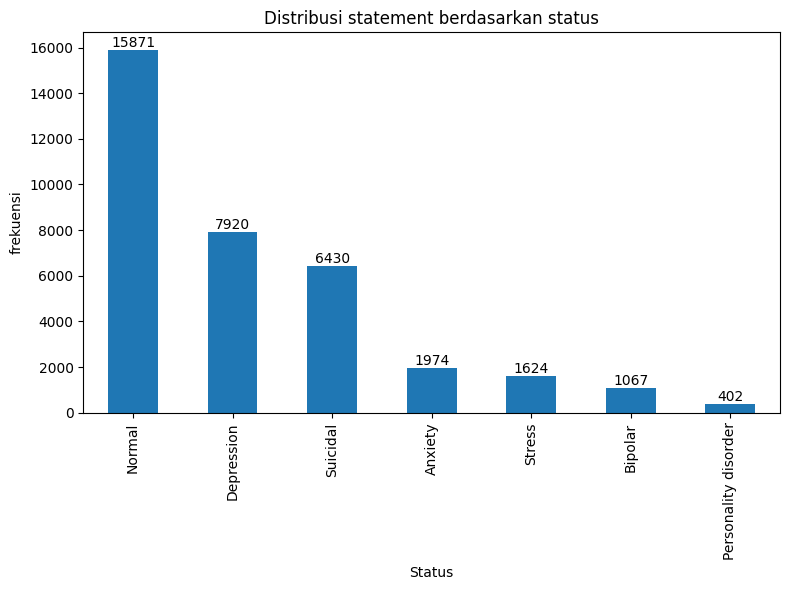

In [11]:
plt.figure(figsize=(8,6))

# get the unique status values and their counts
status_counts = df_data['status'].value_counts()

# create the bar plot
ax = status_counts.plot(kind='bar')

# add the count labels on top of each bar
for i, v in enumerate(status_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Distribusi statement berdasarkan status')
plt.xlabel('Status')
plt.ylabel('frekuensi')
plt.tight_layout()
plt.show() 

In [12]:
df_data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [13]:
# from deep_translator import GoogleTranslator
# from tqdm import tqdm

# # Inisialisasi translator
# translator = GoogleTranslator(source='en', target='id')

# # Fungsi untuk menerjemahkan teks dengan penanganan error
# def translate_text(text):
#     try:
#         return translator.translate(text)
#     except Exception as e:
#         print(f"Error translating text: {text}\nError: {e}")
#         return text  # Kembalikan teks asli jika terjadi error

# # Menggunakan tqdm untuk menampilkan progress bar
# tqdm.pandas()

# # Terapkan fungsi translate ke kolom 'statement'
# df_data['translated_statement'] = df_data['statement'].progress_apply(translate_text)

# df_data.to_csv('data_hasil_translate.csv', index=False)

# df_data.head()

In [14]:
df_data = pd.read_csv('data/data_hasil_translate.csv')
df_data.head()

,statement,status,translated_statement
0,oh my gosh,Anxiety,Ya ampun
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu..."
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu..."
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran..."


In [15]:
df_data['jumlah_kata'] = df_data['translated_statement'].apply(lambda x: len(x.split()))
max_word_count = df_data['jumlah_kata'].max()

print(f"Baris dengan word count tertinggi: {max_word_count}")

Baris dengan word count tertinggi: 133


In [16]:
# Gabungkan semua teks di kolom 'statement' menjadi satu string
all_words = " ".join(df_data['translated_statement'])

# Tokenisasi dan hitung kata unik
unique_words = set(all_words.split())
unique_word_count = len(unique_words)

# Menampilkan hasil
print(f"Jumlah kata unik: {unique_word_count}")

Jumlah kata unik: 65908


In [17]:
from nltk.tokenize import word_tokenize
# Tokenisasi
tokenisasi = df_data['translated_statement'].apply(word_tokenize)

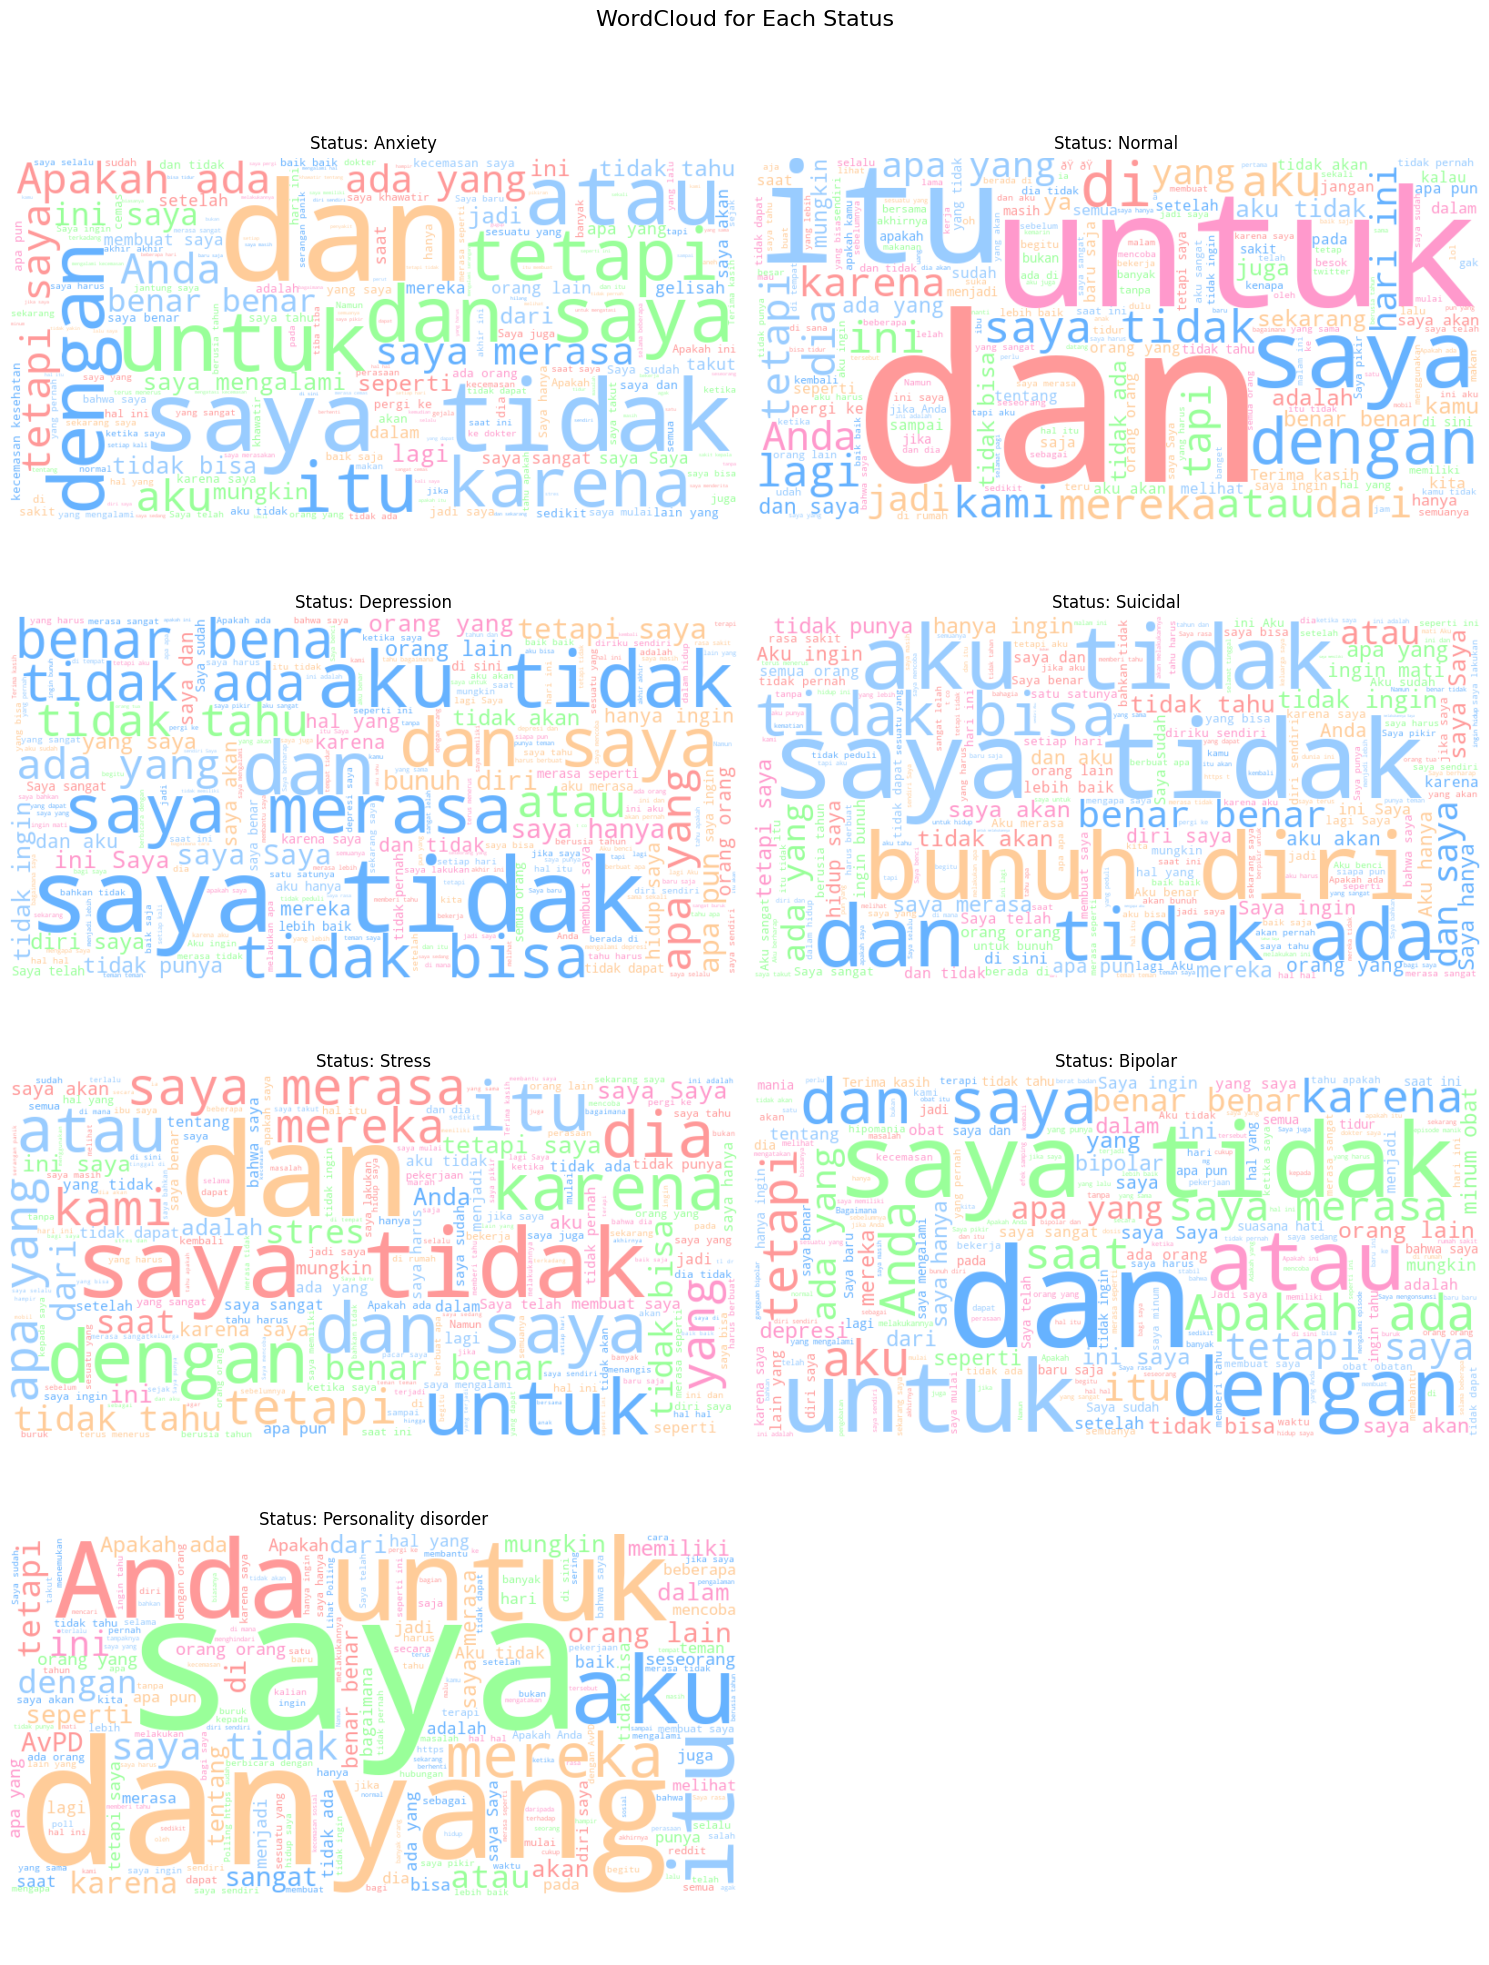

In [18]:
from wordcloud import WordCloud

# Ambil kategori unik dari kolom 'status'
statuses = df_data['status'].unique()

# Tentukan daftar warna untuk WordCloud
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF']

# Fungsi untuk menentukan warna
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

# Buat subplots (4 baris x 2 kolom)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('WordCloud for Each Status', fontsize=16)  # Judul utama

# Iterasi untuk setiap status
for i, status in enumerate(statuses):
    # Gabungkan tokenisasi untuk status saat ini
    tokens_data = ' '.join([' '.join(token) for token, label in zip(tokenisasi, df_data['status']) if label == status])

    # Buat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(tokens_data)

    # Tentukan posisi subplot (baris dan kolom)
    row = i // 2  # Baris
    col = i % 2   # Kolom

    # Plot WordCloud ke subplot
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].axis('off')  # Matikan axis
    axes[row, col].set_title(f'Status: {status}', fontsize=12)

# Sembunyikan subplot yang tidak terpakai
if len(statuses) % 2 != 0:  # Jika jumlah status ganjil
    axes[-1, -1].axis('off')

# Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [19]:
df_data.head()

,statement,status,translated_statement,jumlah_kata
0,oh my gosh,Anxiety,Ya ampun,2
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu...",9
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu...",15
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...,10
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran...",10


In [20]:
df_data.to_csv('data/data_hasil_EDA.csv', index=False)

# Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import stanza
import re
import string

In [2]:
df_data = pd.read_csv('data/data_hasil_EDA.csv')
# df_data.shape
df_data.head()

,statement,status,translated_statement,jumlah_kata
0,oh my gosh,Anxiety,Ya ampun,2
1,"trouble sleeping, confused mind, restless hear...",Anxiety,"susah tidur, pikiran kacau, hati gelisah. Semu...",9
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"Semua salah, mundurlah sayang, maju terus ragu...",15
3,I've shifted my focus to something else but I'...,Anxiety,Aku mengalihkan fokusku ke hal lain tapi aku m...,10
4,"I'm restless and restless, it's been a month n...",Anxiety,"Aku gelisah dan gelisah, sudah sebulan sekaran...",10


In [3]:
vocab_size = 65908
embedding_dim = 50
max_length = 133
trunc_typo = 'post'
padding = 'post'
token_oov = "<OOV>"

In [4]:
# 0. Cleaning Text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]\(.*?\)', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text

In [5]:
# 1. Convert text to lowercase
def to_lower(text):
    return text.lower()

In [6]:
# 2. Remove stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# List stopword tambahan
manual_stopwords = {"aku", "kamu", "dia", "mereka", "kita", "kami", "mu", "ku", "nya", "itu", "ini", "sini", "situ", "sana", "begitu", "yaitu", "yakni", 
                    "walaupun", "meskipun", "agar", "biar", "supaya", "akan", "telah", "baru", "lagi", "masih", "sekarang", "tadi", "kemarin", "nanti", 
                    "besok", "lalu", "kemudian", "sambil", "serta", "tetapi", "melainkan", "sehingga", "sebab", "karena", "hanya", "saja", "justru", "bahkan", 
                    "memang", "kan", "lah", "pun", "dong", "lho", "kok", "deh", "ya", "nah", "aduh", "oh", "eh", "loh", "seperti", "bagai", "bagaikan", 
                    "umpama", "ibarat", "laksana", "anda", "gua", "elo", "dong", "toh", "lagi", "apalagi", "yang", "untuk", "ke", "dari", "pada", "dengan", 
                    "oleh", "tanpa", "antara", "di", "sebuah", "seorang", "para", "bagi", "atas", "dalam", "namun", "demikian", "juga", "malah", "malahan", 
                    "berikut", "tersebut", "jadi", "adalah", "sebagai", "bukan", "tidak", "iya", "nggak", "ga", "enggak", "sangat", "paling", "amat", "cukup", 
                    "lebih", "kurang", "begitu", "maupun", "apalagi", "misalnya", "sekalipun", "meski", "ketika", "dimana", "siapa", "apa", "kapan", "bagaimana", 
                    "selain", "setelah", "sebelum", "sesudah", "hingga", "selama", "sementara", "sampai", "kemana", "darimana", "kenapa", "mengapa",
                    "wkwk", "haha", "hehe", "hihi", "loh", "yah", "udah", "aja", "banget", "abis", "gitu", "tau", "doang", "nih", "tuh", "kayak", "ngapain", 
                    "nggak", "ngga", "yaudah", "yaelah", "anjay", "anjir", "ciyee", "btw", "cmiiw", "gw", "gua", "gue", "gak", "sih", "loh", "dong", "malah", 
                    "makanya", "kenapa", "ngapain", "apaan", "mau", "ye", "cie", "ciee", "oke", "ok", "sip", "bro", "sis", "mantul", "tapi", "emang", "ya", 
                    "masa", "sumpah", "padahal", "daripada", "udah", "ntar", "yaudah", "bang", "cek", "makasih", "terus", "anj", "kalo", "ntar", "sama", 
                    "soalnya", "jangan", "kek", "kayaknya", "lah", "masih", "eh", "gak", "loh", "kan"
                    }

stop_words.update(manual_stopwords)

# Fungsi untuk menghapus stopword
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [7]:
# 3. Lemmatization
nlp = stanza.Pipeline('id', processors='tokenize,lemma', use_gpu=False)

# Fungsi lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    sentences = []
    for sentence in doc.sentences:
        lemmas = [word.lemma for word in sentence.words]
        sentences.append(' '.join(lemmas))

    return ' '.join(sentences)

2024-11-23 07:06:09 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-11-23 07:06:10 INFO: Downloaded file to C:\Users\RafiAchmadfr\stanza_resources\resources.json
2024-11-23 07:06:10 WARNING: Language id package default expects mwt, which has been added
2024-11-23 07:06:10 INFO: Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| lemma     | gsd_nocharlm |

2024-11-23 07:06:10 INFO: Using device: cpu
2024-11-23 07:06:10 INFO: Loading: tokenize
c:\Users\RafiAchmadfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the defau

In [8]:
from tqdm.notebook import tqdm

# Fungsi utama preprocessing
def preprocessing_text(df, column_name):
    df = df.copy()
    
    tqdm.pandas(desc="Cleaning Text")
    df[column_name] = df[column_name].progress_apply(clean_text)

    tqdm.pandas(desc="Lowercasing Text")
    df[column_name] = df[column_name].progress_apply(to_lower)

    tqdm.pandas(desc="Removing Stopwords")
    df[column_name] = df[column_name].progress_apply(remove_stopwords)

    tqdm.pandas(desc="Lemmatizing Text")
    df[column_name] = df[column_name].progress_apply(lemmatize_text)

    return df

In [9]:
# Memanggil fungsi preprocessing
df_data = preprocessing_text(df_data, "translated_statement")
df_data.head()

Cleaning Text:   0%|          | 0/35288 [00:00<?, ?it/s]

Lowercasing Text:   0%|          | 0/35288 [00:00<?, ?it/s]

Removing Stopwords:   0%|          | 0/35288 [00:00<?, ?it/s]

Lemmatizing Text:   0%|          | 0/35288 [00:00<?, ?it/s]

,statement,status,translated_statement,jumlah_kata
0,oh my gosh,Anxiety,ampun,2
1,"trouble sleeping, confused mind, restless hear...",Anxiety,susah tidur pikir kacau hati gelisah semua tak...,9
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,semua salah mundur lah sayang maju ragu tetapl...,15
3,I've shifted my focus to something else but I'...,Anxiety,alih fokusku khawatir,10
4,"I'm restless and restless, it's been a month n...",Anxiety,gelisah gelisah sebul nak maksudmu,10


In [24]:
# Hapus data kosong
df_data.dropna(inplace = True)
df_data.isnull().sum()

statement               0
status                  0
translated_statement    0
jumlah_kata             0
dtype: int64

In [37]:
word_count = df_data['translated_statement'].apply(lambda x: len(x.split()))
max_word_count = word_count.max()

print(f"Baris dengan word count tertinggi: {max_word_count}")

Baris dengan word count tertinggi: 99


In [25]:
df_data.to_csv('data/data_hasil_prepos.csv', index=False)

# Pre-Trained Word2Vector

In [93]:
import pandas as pd
import numpy as np
import h5py

In [94]:
vocab_size = 65908
embedding_dim = 100
max_sequence_length = 100

In [95]:
df_data = pd.read_csv('data/data_hasil_prepos.csv')

df_data.head()

,statement,status,translated_statement,jumlah_kata
0,oh my gosh,Anxiety,ampun,2
1,"trouble sleeping, confused mind, restless hear...",Anxiety,susah tidur pikir kacau hati gelisah semua tak...,9
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,semua salah mundur lah sayang maju ragu tetapl...,15
3,I've shifted my focus to something else but I'...,Anxiety,alih fokusku khawatir,10
4,"I'm restless and restless, it's been a month n...",Anxiety,gelisah gelisah sebul nak maksudmu,10


In [96]:
from nltk.tokenize import word_tokenize

df_data['tokenized'] = df_data['translated_statement'].apply(word_tokenize)

In [97]:
sentences = df_data['tokenized'].tolist()

In [98]:
# Latih model Word2Vec
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences, 
                          vector_size=max_sequence_length, 
                          window=10, 
                          min_count=1, 
                          workers=4)

In [99]:
# Simpan Word2Vec model
word2vec_model.save("word2vec_model_MentalQ.model")

# Simpan embedding ke file .h5
with h5py.File("word2vec_model_MentalQ.h5", "w") as h5file:
    h5file.create_dataset("vocab", data=word2vec_model.wv.index_to_key, dtype=h5py.string_dtype(encoding='utf-8'))
    h5file.create_dataset("vectors", data=word2vec_model.wv.vectors)

print("Word2Vec model dan embeddings berhasil disimpan ke file .h5.")

Word2Vec model dan embeddings berhasil disimpan ke file .h5.


In [100]:
# Buat word_index dari Word2Vec
word_index = {word: i + 1 for i, word in enumerate(word2vec_model.wv.index_to_key)}

# Buat embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [101]:
# === LANGKAH 4: KONVERSI TEKS KE SEQUENCE ===

# Fungsi untuk mengonversi token menjadi indeks
def text_to_sequence(tokens, word_index):
    return [word_index[word] for word in tokens if word in word_index]

# Ubah kolom 'tokenized' menjadi sequence
df_data['sequence'] = df_data['tokenized'].apply(lambda x: text_to_sequence(x, word_index))

In [102]:
# Padding sequence agar semua memiliki panjang yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(df_data['sequence'], maxlen=max_sequence_length, padding='post')
print(padded_sequence)

[[1045    0    0 ...    0    0    0]
 [1208   36   11 ...    0    0    0]
 [   9   64 1300 ...    0    0    0]
 ...
 [  33  187  743 ...    0    0    0]
 [ 250  273   33 ...    0    0    0]
 [  47   10  146 ...    0    0    0]]


In [103]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
status_encoded = label_encoder.fit_transform(df_data['status'])
print(status_encoded)

[0 0 0 ... 0 0 0]


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence,
                                                    status_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=status_encoded
                                                    )

# Tunning Hyperparameter

In [105]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

In [109]:
def create_tuning_model(hp):
    model = Sequential([
        # Embedding Layer
        Embedding(input_dim=len(word_index) + 1, 
                  output_dim=100,
                  weights=[embedding_matrix], 
                  input_length=max_sequence_length, 
                  trainable=hp.Boolean('trainable_embedding', default=False)),  # Embedding trainable atau tidak

        # Bidirectional LSTM
        Bidirectional(LSTM(units=hp.Int('lstm_units', min_value=64, max_value=256, step=32), 
                           kernel_regularizer=l2(hp.Float('l2_regularizer', min_value=0.001, max_value=0.01, step=0.001)),
                           return_sequences=False)),
        Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        BatchNormalization(),

        # Dense Layers
        Dense(units=hp.Int('dense_units_1', min_value=16, max_value=128, step=16), activation='relu'),
        Dropout(rate=hp.Float('dropout_rate_dense', min_value=0.2, max_value=0.5, step=0.1)),
        BatchNormalization(),

        Dense(units=hp.Int('dense_units_2', min_value=8, max_value=64, step=8), activation='relu'),
        Dropout(rate=hp.Float('dropout_rate_dense', min_value=0.2, max_value=0.5, step=0.1)),
        BatchNormalization(),

        # Output Layer
        Dense(7, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [110]:
# Inisialisasi RandomSearch Tuner
tuner = RandomSearch(
    create_tuning_model,
    objective='val_accuracy',  # Target yang ingin dioptimalkan
    max_trials=10,            # Jumlah percobaan model
    executions_per_trial=2,   # Eksekusi ulang setiap model untuk hasil stabil
    directory='keras_tuner_results',
    project_name='mentalQ_tuning'
)

# Menampilkan ruang pencarian hyperparameter
tuner.search_space_summary()

Search space summary
Default search space size: 8
trainable_embedding (Boolean)
{'default': False, 'conditions': []}
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
l2_regularizer (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.001, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
dropout_rate_dense (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dense_units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sam

In [111]:
# Gunakan data training untuk tuning hyperparameter
tuner.search(X_train, y_train,
             epochs=10,           # Epoch lebih kecil untuk tuning awal
             validation_data=(X_test, y_test),
             batch_size=128)

Trial 10 Complete [00h 28m 22s]
val_accuracy: 0.7358544170856476

Best val_accuracy So Far: 0.7409724295139313
Total elapsed time: 03h 51m 36s


In [114]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Hyperparameter terbaik:
- LSTM Units: {best_hps.get('lstm_units')}
- Dropout: {best_hps.get('dropout_rate')}
- Dense Units 1: {best_hps.get('dense_units_1')}
- Dense Units 2: {best_hps.get('dense_units_2')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


Hyperparameter terbaik:
- LSTM Units: 128
- Dropout: 0.2
- Dense Units 1: 80
- Dense Units 2: 32
- Learning Rate: 0.0015516309595003499



# Modeling

In [115]:
def create_model(embedding_dim):
    model = Sequential([
        # Embedding Layer
        Embedding(input_dim=len(word_index) + 1, 
                  output_dim=embedding_dim, 
                  weights=[embedding_matrix], 
                  input_length=max_sequence_length, 
                  trainable=False),

        # Bidirectional LSTM 1
        Bidirectional(LSTM(128, kernel_regularizer=l2(0.01), return_sequences=False)),
        Dropout(0.2),
        BatchNormalization(),

        # Dense Layer 1
        Dense(80, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        BatchNormalization(),

        # Dense Layer 2
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        BatchNormalization(),

        # Output Layer
        Dense(7, activation='softmax')
    ])
    
    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.0015516309595003499),
        loss='sparse_categorical_crossentropy',  # Gunakan categorical_crossentropy jika label di-one-hot encode
        metrics=['accuracy']
    )
    return model

In [116]:
model = create_model(embedding_dim)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     2,791,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,791,500 (10.65 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,791,500 (10.65 MB)

# Train & Evaluasi Model

In [117]:
num_epochs = 50
batch = 128

history = model.fit(X_train, y_train,
                    epochs = num_epochs,
                    batch_size=batch,
                    validation_data=(X_test, y_test),
                    )

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 81s 349ms/step - accuracy: 0.5434 - loss: 3.7289 - val_accuracy: 0.6299 - val_loss: 1.4821
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 75s 341ms/step - accuracy: 0.6686 - loss: 1.2191 - val_accuracy: 0.6749 - val_loss: 1.0408
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 77s 349ms/step - accuracy: 0.6852 - loss: 0.9974 - val_accuracy: 0.6918 - val_loss: 0.9790
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 79s 361ms/step - accuracy: 0.6891 - loss: 0.9513 - val_accuracy: 0.6828 - val_loss: 0.9744
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 78s 355ms/step - accuracy: 0.6949 - loss: 0.9446 - val_accuracy: 0.6844 - val_loss: 0.9456
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 79s 361ms/step - accuracy: 0.6962 - loss: 0.9228 - val_accuracy: 0.6958 - val_loss: 0.8989
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 78s 355ms/step - accuracy: 0.7040 - loss: 0.8999 - val_accuracy: 0.7037 - val_loss: 0.8794
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 80s 361ms/step - accuracy: 0.7001 - loss: 0

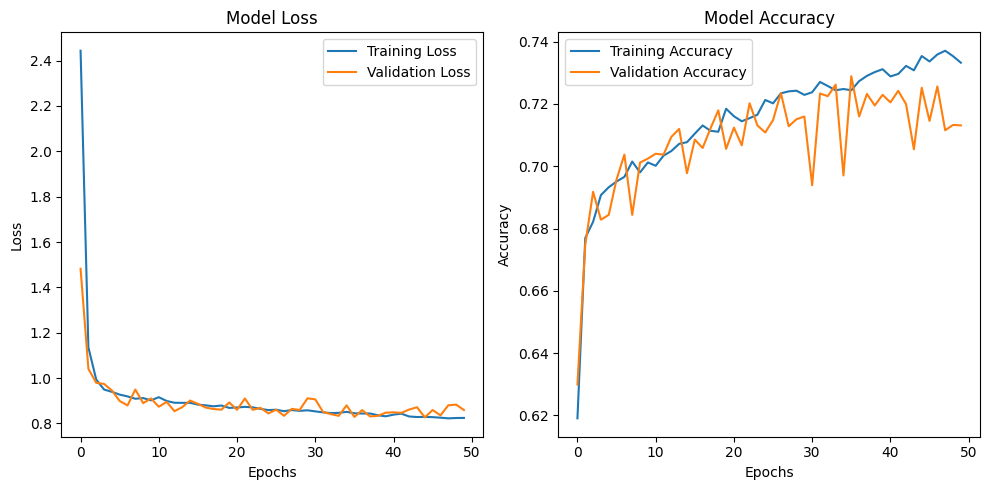

In [118]:
import matplotlib.pyplot as plt

ig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Menampilkan subplot
plt.tight_layout()
plt.show()

In [119]:
model.save('model.h5')